In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #plots
%matplotlib inline
import seaborn as sns #visualization
import os
import csv
from datetime import datetime

In [2]:
#load data 
df = pd.read_csv("/Users/clairekraft/Downloads/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
df.head() #profile

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info #profile

<bound method DataFrame.info of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel 

In [5]:
df.describe() #profile

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
df.nunique() #profile

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [7]:
print('\nColumns with missing value:') #cleaning
print(df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


In [8]:
df.isnull().sum().sum()

3631

In [9]:
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)

In [10]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

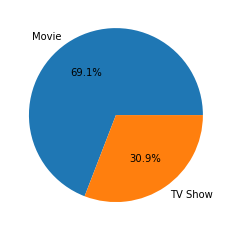

In [11]:
#moives vs tv shows
plt.pie(x=df["type"].value_counts(), labels=df["type"].value_counts().index, autopct=lambda x:f"{x:.1f}%");

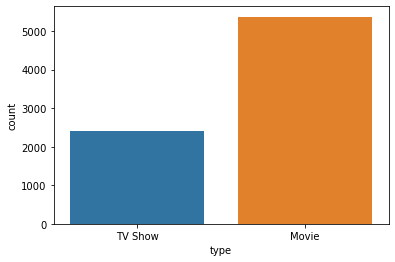

In [12]:
sns.countplot(x="type", data=df);

In [13]:
#ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

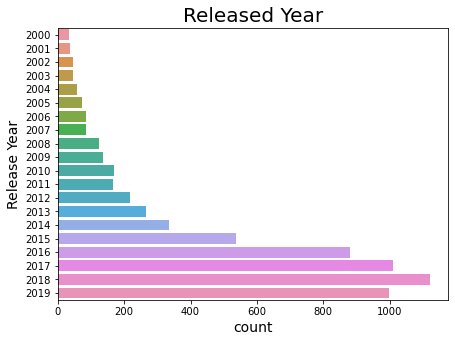

In [14]:
#Release
plt.figure(figsize = (7, 5))
sns.countplot(y="release_year", data=df[(df["release_year"]>=2000) & (df["release_year"]<2020)]);
plt.title('Released Year', fontsize = 20);
plt.ylabel('Release Year', fontsize = 14);
plt.xlabel('count', fontsize = 14);

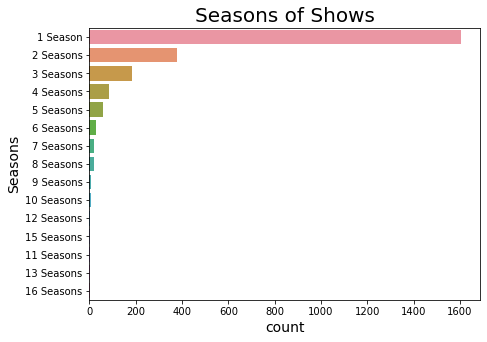

In [15]:
#Seasons come and go
tv_show = df[df['type'] == 'TV Show']
plt.figure(figsize = (7, 5))
sns.countplot(y = 'duration', data = tv_show, order = tv_show['duration'].value_counts().head(25).index);
plt.title('Seasons of Shows', fontsize = 20);
plt.ylabel('Seasons', fontsize = 14);
plt.xlabel('count', fontsize = 14);

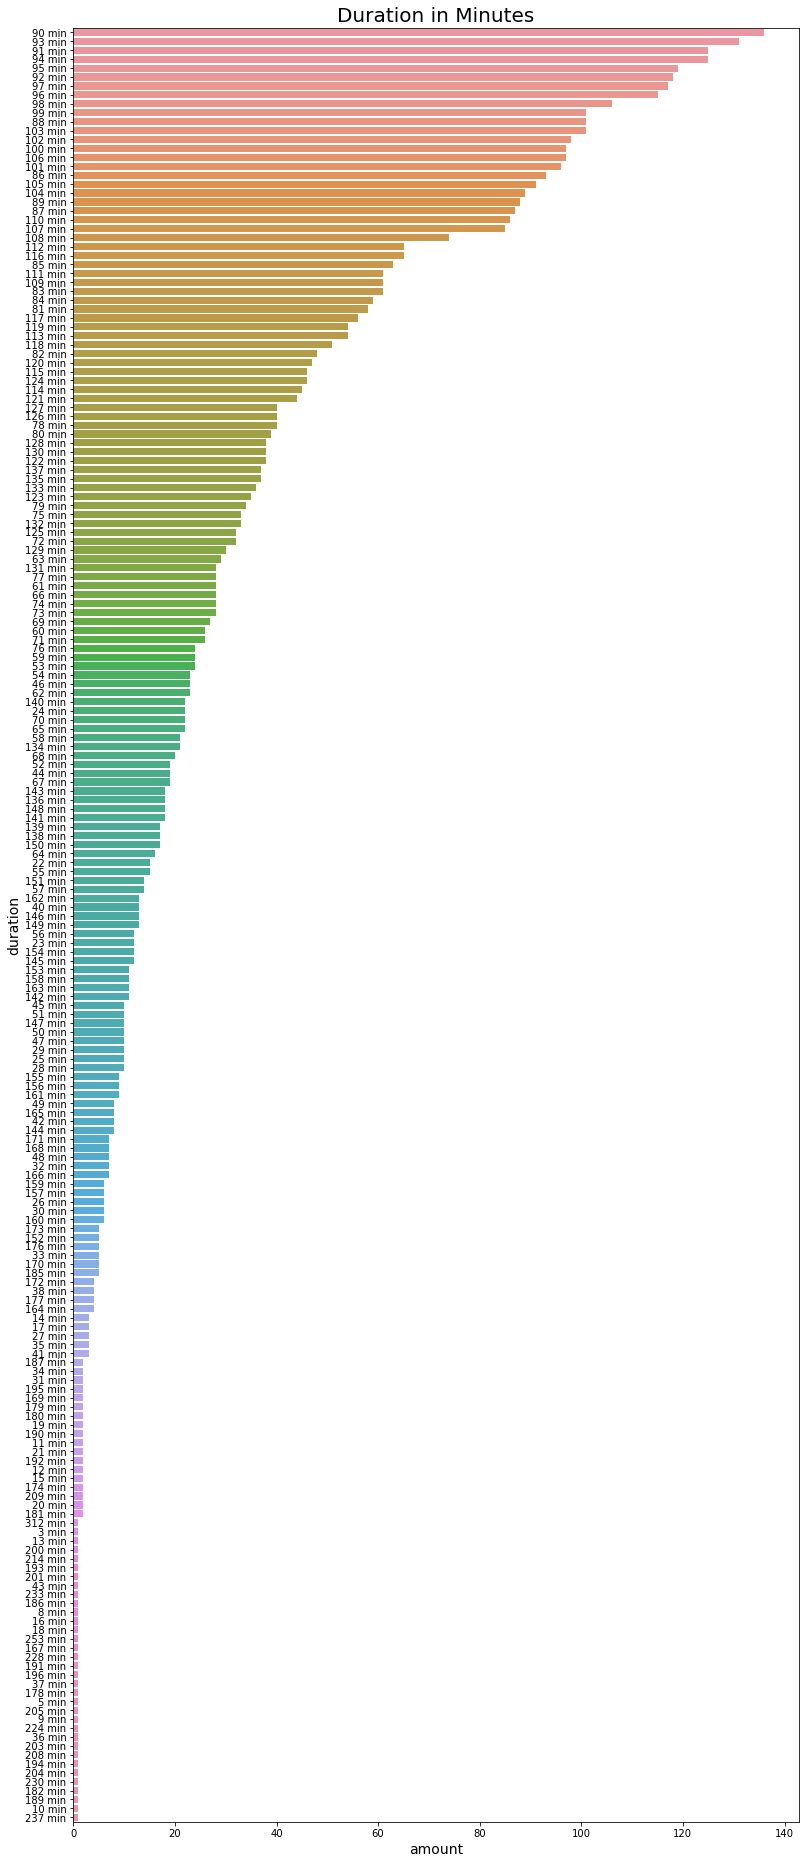

In [16]:
#Duration-- do you run (netflix) marathons?
plt.figure(figsize = (13, 33))
movie = df[df['type'] == 'Movie']
sns.countplot(y = 'duration', data = movie, order = movie['duration'].value_counts().index);
plt.title('Duration in Minutes', fontsize = 20);
plt.ylabel('duration', fontsize = 14);
plt.xlabel('amount', fontsize = 14);

<ipython-input-17-f9cebd0c1347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration'] = movie['duration'].str.strip(' min')
<ipython-input-17-f9cebd0c1347>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration'] = movie['duration'].astype(int)


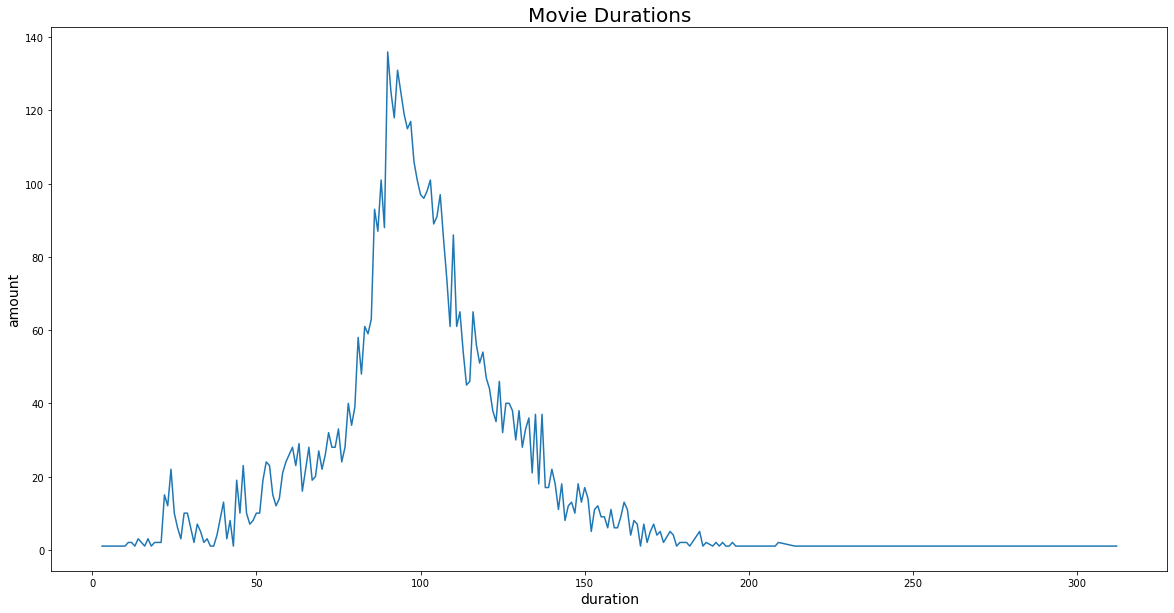

In [17]:
movie['duration'] = movie['duration'].str.strip(' min')
movie['duration'] = movie['duration'].astype(int)
movie_duration = movie['duration'].value_counts()

fig = plt.figure(figsize = (20,10));
sns.lineplot(data = movie_duration);
plt.title('Movie Durations', fontsize = 20);
plt.ylabel('amount', fontsize = 14);
plt.xlabel('duration', fontsize = 14);

In [18]:
#How many counties work w/ Netflix?
df.isnull().sum()
df.dropna(inplace = True) 
df.shape

(7770, 12)

In [19]:
df['country_projects'] = df['country'].apply(lambda x :  x.replace(', ',',').replace(' ,','').split(','))

In [20]:
country_projects = {}
for i in df['country_projects']:
    for length in range(len(i)):
        if i[length] in country_projects:
            country_projects[i[length]]+=1
        else:
            country_projects[i[length]]=1

In [21]:
country_projects

{'Brazil': 88,
 'Mexico': 154,
 'Singapore': 39,
 'United States': 3288,
 'Turkey': 108,
 'Egypt': 110,
 'India': 990,
 'Poland': 36,
 'Thailand': 65,
 'Nigeria': 76,
 'Country Unavailable': 505,
 'Norway': 29,
 'Iceland': 9,
 'United Kingdom': 722,
 'Japan': 285,
 'South Korea': 212,
 'Italy': 89,
 'Canada': 412,
 'Indonesia': 80,
 'Romania': 12,
 'Spain': 215,
 'South Africa': 54,
 'France': 349,
 'Portugal': 4,
 'Hong Kong': 102,
 'China': 147,
 'Germany': 199,
 'Argentina': 82,
 'Serbia': 7,
 'Denmark': 44,
 'Kenya': 5,
 'New Zealand': 28,
 'Pakistan': 24,
 'Australia': 142,
 'Taiwan': 85,
 'Netherlands': 45,
 'Philippines': 78,
 'United Arab Emirates': 34,
 'Iran': 4,
 'Belgium': 85,
 'Israel': 26,
 'Uruguay': 14,
 'Bulgaria': 9,
 'Chile': 26,
 'Russia': 27,
 'Mauritius': 1,
 'Lebanon': 26,
 'Colombia': 45,
 'Algeria': 2,
 'Soviet Union': 3,
 'Sweden': 39,
 'Malaysia': 26,
 'Ireland': 40,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 11,
 'Peru': 10,
 'Senegal': 3,
 'Switzerland'

In [22]:
print(f'{len(country_projects)} countries work with Netflix')

119 countries work with Netflix


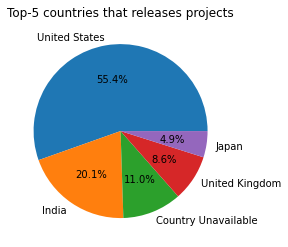

In [23]:
#Which country is the most creative? Creative = most films and tv shows produced in the x coutnry
plt.pie(df["country"].value_counts()[:5], labels = df["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases projects");

In [24]:
df["country"].value_counts()[:5]

United States          2546
India                   923
Country Unavailable     505
United Kingdom          396
Japan                   224
Name: country, dtype: int64

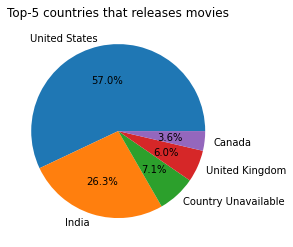

In [25]:
#Countries produced the most films
plt.pie(movie["country"].value_counts()[:5], labels = movie["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases movies");

In [26]:
movie["country"].value_counts()[:5]

United States          1847
India                   852
Country Unavailable     229
United Kingdom          193
Canada                  118
Name: country, dtype: int64

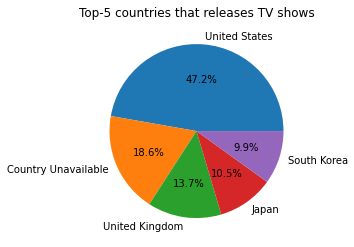

In [27]:
#Countries produced the most tv shows
plt.pie(tv_show["country"].value_counts()[:5], labels = tv_show["country"].value_counts().index[:5], autopct=lambda x:f"{x:.1f}%");
plt.title("Top-5 countries that releases TV shows");

In [28]:
tv_show["country"].value_counts()[:5]

United States          699
Country Unavailable    276
United Kingdom         203
Japan                  155
South Korea            147
Name: country, dtype: int64

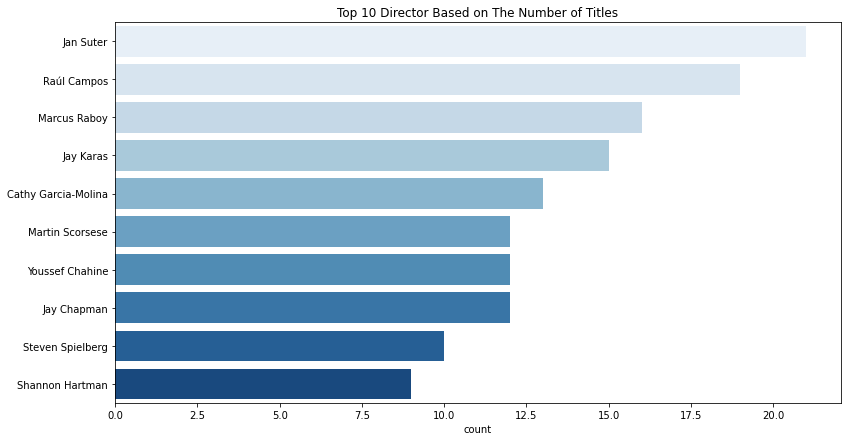

In [29]:
#Top directors
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

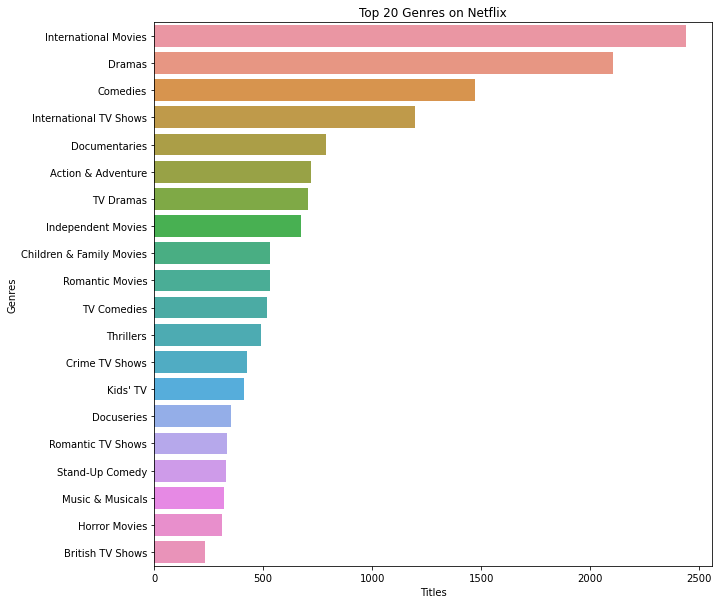

In [30]:
#Top genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [31]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

In [32]:
genre = {}
for i in df['genre']:
    for length in range(len(i)):
        if i[length] in genre:
            genre[i[length]]+=1
        else:
            genre[i[length]]=1

In [33]:
genre

{'International TV Shows': 1197,
 'TV Dramas': 703,
 'TV Sci-Fi & Fantasy': 75,
 'Dramas': 2105,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'TV Mysteries': 90,
 'Thrillers': 491,
 'Crime TV Shows': 426,
 'Docuseries': 352,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Anime Series': 146,
 'Reality TV': 222,
 'TV Comedies': 517,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'Movies': 52,
 'British TV Shows': 231,
 'Korean TV Shows': 150,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 "Kids' TV": 411,
 'TV Action & Adventure': 149,
 'Spanish-Language TV Shows': 146,
 'Children & Family Movies': 532,
 'TV Shows': 12,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'Stand-Up Comedy': 329,
 'Anime Features': 57,
 'TV Thrillers': 50,
 'Classi

In [34]:
print(f'There are {len(genre)} genres')

There are 42 genres


In [35]:
print(f"The most popular genre is : {max(genre, key=genre.get)}, there are {genre[max(genre, key=genre.get)]} projects that have this genre")

The most popular genre is : International Movies, there are 2437 projects that have this genre
